In [176]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

from utils import read_data, clean_data

pd.set_option('display.max_rows', None)

## Price development over a single day for Sparpreis and Super Sparpreis
From our given plots we can draw conclusions for the flexpreis tickets but not for the sparpreis tickets. We now look at the price development over the course of a single day, always for a specific day of the week for an age group without discount.  

In [177]:
ticket_type = 'Sparpreis'
route = 'berlin-memmingen'
day_string = '12_11_2022'

age_discount = 'data_Y_0_2'
amount_of_weeks = 10



In [178]:
df = pd.DataFrame()

for day in range(1, amount_of_weeks+1):
    days_to_add = day*7
    file_path = f'data/{route}/{age_discount}/{day_string}_Y_0.csv'
    new_df = read_data(file_path)
    new_df = clean_data(new_df)
    df = pd.concat([df, new_df], ignore_index=True)
    
    day = datetime.datetime.strptime(day_string, '%d_%m_%Y').date()

    day = datetime.datetime.now() + datetime.timedelta(days_to_add)
    day_string = day.strftime('%d_%m_%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         1203 non-null   float64       
 1   ticket type   1203 non-null   object        
 2   age           1203 non-null   object        
 3   discount      1203 non-null   int64         
 4   departure     1203 non-null   object        
 5   destination   1203 non-null   object        
 6   changes       1203 non-null   int64         
 7   tariffClass   1203 non-null   int64         
 8   datetime dep  1203 non-null   datetime64[ns]
 9   datetime arr  1203 non-null   datetime64[ns]
 10  sub [min]     1203 non-null   float64       
 11  time          1203 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 112.9+ KB


In [179]:
df = df.sort_values(by='time')
df.shape

(1203, 12)

In [180]:
df_sparpreis = df.loc[df['ticket type'] == 'Sparpreis']
df_super_sparpreis = df.loc[df['ticket type'] == 'Super Sparpreis']

df_all_sparpreis = pd.concat([df_sparpreis, df_super_sparpreis], ignore_index=True)
df_all_sparpreis = df_all_sparpreis.sort_values(by='time')

In [181]:
unique_prices = df_sparpreis['price'].nunique()
unique_time = df_sparpreis['time'].nunique()
print(unique_prices)
print(unique_time)

19
36


In [182]:
df_sparpreis

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
972,29.9,Sparpreis,Y,0,Berlin,Memmingen,2,2,2023-01-12 00:22:00,2023-01-12 10:54:00,632.0,00:22
1088,29.9,Sparpreis,Y,0,Berlin,Memmingen,2,2,2023-01-19 00:22:00,2023-01-19 10:54:00,632.0,00:22
504,29.9,Sparpreis,Y,0,Berlin,Memmingen,2,2,2022-12-15 00:22:00,2022-12-15 10:54:00,632.0,00:22
730,39.9,Sparpreis,Y,0,Berlin,Memmingen,2,2,2022-12-29 00:22:00,2022-12-29 10:54:00,632.0,00:22
236,29.9,Sparpreis,Y,0,Berlin,Memmingen,1,2,2022-12-01 03:56:00,2022-12-01 10:59:00,423.0,03:56
852,29.9,Sparpreis,Y,0,Berlin,Memmingen,1,2,2023-01-05 04:28:00,2023-01-05 10:59:00,391.0,04:28
508,29.9,Sparpreis,Y,0,Berlin,Memmingen,1,2,2022-12-15 04:28:00,2022-12-15 10:59:00,391.0,04:28
976,29.9,Sparpreis,Y,0,Berlin,Memmingen,1,2,2023-01-12 04:28:00,2023-01-12 10:59:00,391.0,04:28
1092,29.9,Sparpreis,Y,0,Berlin,Memmingen,1,2,2023-01-19 04:28:00,2023-01-19 10:59:00,391.0,04:28
388,29.9,Sparpreis,Y,0,Berlin,Memmingen,1,2,2022-12-08 04:30:00,2022-12-08 10:59:00,389.0,04:30


/tmp/ipykernel_136566/694923908.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


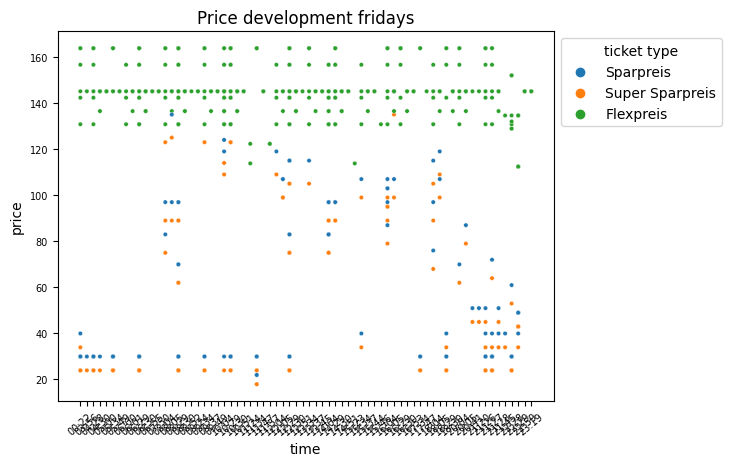

In [183]:
plt = sb.scatterplot(data=df_all_sparpreis, x='time', y='price', hue='ticket type',s=10)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
plt.tick_params(labelsize=7)
title = f'Price development fridays'
plt.set(title=title)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

In [172]:
min_sparpreis = df_sparpreis['price'].min()
min_sparpreis

21.9

In [173]:
max_sparpreis = df_sparpreis['price'].max()
max_sparpreis

144.9

In [174]:
min_super_sparpreis = df_super_sparpreis['price'].min()
min_super_sparpreis

17.9

In [175]:
max_super_sparpreis = df_super_sparpreis['price'].max()
max_super_sparpreis

134.9